# Forecasting of Home Sales - Time Series

Using machine learning on MLS (Multiple Listing Services) data to accurately predict real estate volume of Santa Monica and Greater Los Angeles Area

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from epiweeks import Week
from statsmodels.tools.eval_measures import rmse
from src.time_scripts import *

pd.options.display.max_columns = None
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
pd.plotting.register_matplotlib_converters()

In [4]:
from pylab import rcParams
rcParams['figure.figsize']=12,5

## READ CSV INTO DATAFRAME

In [5]:
master=pd.read_csv('data/clean_master.csv',header=0, index_col=0)

## IMPORT PROPHET

In [6]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot
from src.time_scripts import *

Separate into property type and city subsets

In [7]:
master, sfr_master, condo_master, town_master, sm_data, bh_data, sl_data = forecasting_datasets_setup(master) 

## Split into Weeks
+ split into weekly unit closed count
+ split into different cities

## Data is formatted for modeling

In [8]:
# data by city
sm_count_weekly_data=week_split_count(sm_data)
bh_count_weekly_data=week_split_count(bh_data)
sl_count_weekly_data=week_split_count(sl_data)

In [9]:
# data is compared at different time increments
master_day_data=day_split_count(master)
sfr_day_data=day_split_count(sfr_master)
condo_day_data=day_split_count(condo_master)

master_week_data=week_split_count(master)
sfr_week_data=week_split_count(sfr_master)
condo_week_data=week_split_count(condo_master)

# master_month_data=time_series_sale_count(master)
# sfr_month_data=time_series_sale_count(sfr_master)
# condo_month_data=time_series_sale_count(condo_master)


# Implement Facebook Prophet

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


''

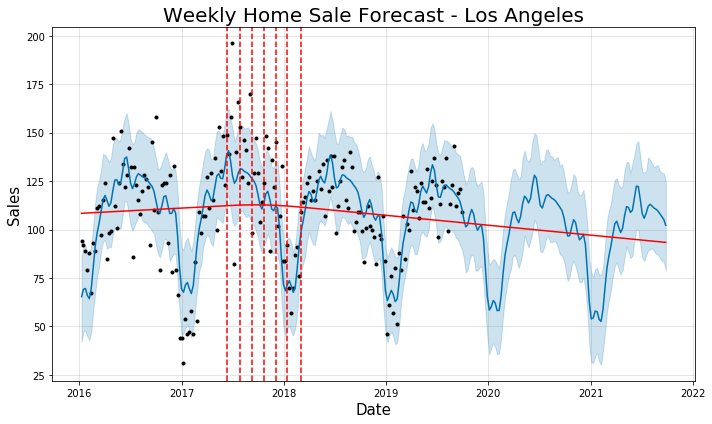

In [10]:
master_model=Prophet()
master_model.fit(master_week_data)
master_future = master_model.make_future_dataframe(periods=104,freq='W')
master_forecast = master_model.predict(master_future)
fig = master_model.plot(master_forecast)
a = add_changepoints_to_plot(fig.gca(),master_model,master_forecast)
plt.title('Weekly Home Sale Forecast - Los Angeles',size=20)
plt.xlabel('Date',size=15)
plt.ylabel('Sales',size=15)
plt.savefig('pictures/house_sale_forecast.png')
plt.tight_layout()
;

## Out of the box forecasting model

''

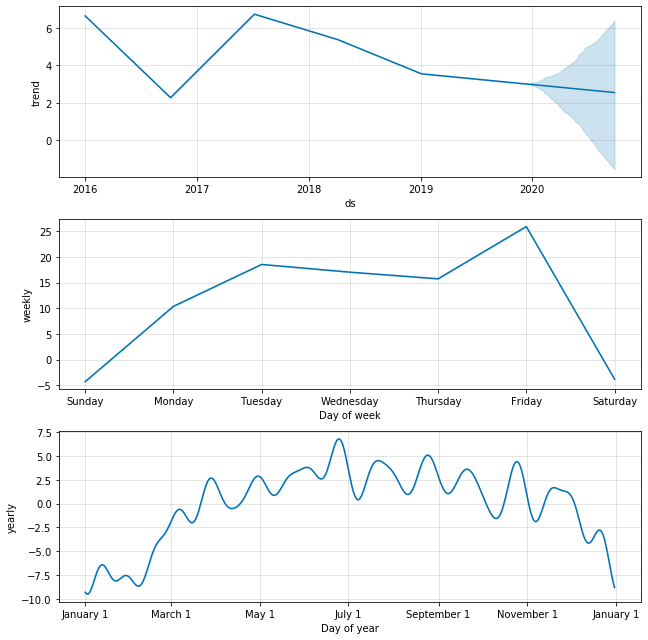

In [11]:
## These are the parameters that are tuned for better performance
master_model=Prophet(
    growth='linear',
    n_changepoints=4,
    changepoint_range=0.8,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='additive',
    seasonality_prior_scale=20,
    changepoint_prior_scale=.5,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    ).add_seasonality(
        name='weekly',
        period=7,
        fourier_order=20
    ).add_seasonality(
        name='yearly',
        period=365.25,
        fourier_order=20)
master_model.fit(master_day_data)
master_future = master_model.make_future_dataframe(periods=365)
master_forecast = master_model.predict(master_future)
master_model.plot_components(master_forecast)
plt.savefig('pictures/plot_components_daily.png')
;

Test the model by splitting it and comparing the prediction to data the model has not seen yet.

In [12]:
master_week_data.shape[0] # check size of dataframe

195

## Use naive forecasting as baseline prediction

MAPE = 0.084
RMSE = 11.121
MEAN = 110.07
BASELINE MAPE = 0.085
BASELINE RMSE = 11.858


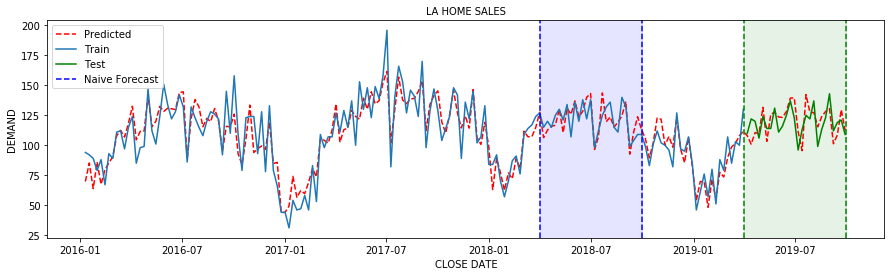

In [13]:
split=169 
freq='W'
train_test_split_weekly_analysis(master_week_data,split,freq)
plt.title('LA HOME SALES', fontsize=10)

# Label plots
plt.xlabel('CLOSE DATE', fontsize=10)
plt.ylabel('DEMAND', fontsize=10)
plt.savefig('pictures/LA_volume.png');

## Analyze residence type: SFR
+ fitting the model and looking at SFR property types specifically 

MAPE = 0.096
RMSE = 9.958
MEAN = 76.76
BASELINE MAPE = 0.181
BASELINE RMSE = 19.632


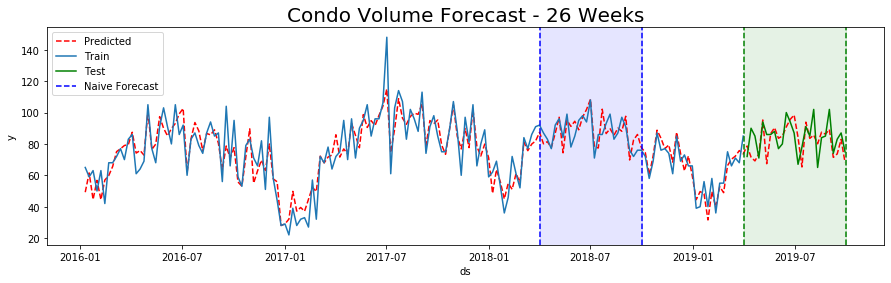

In [14]:
changepoints=48
split=169
freq='W'


prophet_analysis(sfr_week_data,split,freq,changepoints)
plt.title('Condo Volume Forecast - 26 Weeks', fontsize=20)
plt.savefig('pictures/sfr_volume.png');

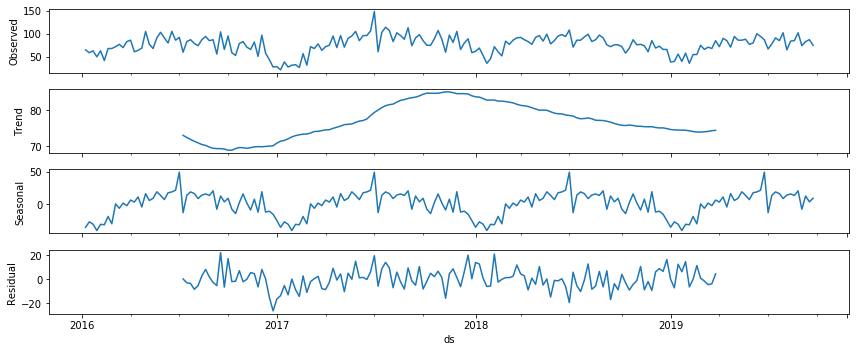

In [15]:
plot_decompose(sfr_week_data)

## Analyze residence type: Condo

MAPE = 0.162
RMSE = 5.81
MEAN = 27.93
BASELINE MAPE = 0.307
BASELINE RMSE = 9.482


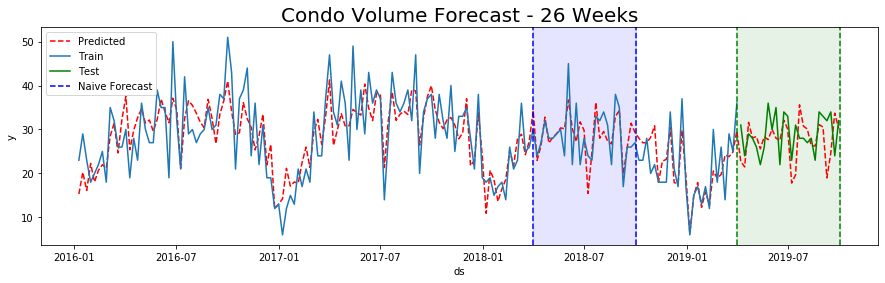

In [16]:
changepoints=48
split=169
freq='W'


prophet_analysis(condo_week_data,split,freq,changepoints)
plt.savefig('pictures/condo_weekly_split.png')
plt.title('Condo Volume Forecast - 26 Weeks', fontsize=20)
plt.savefig('pictures/condo_volume.png');

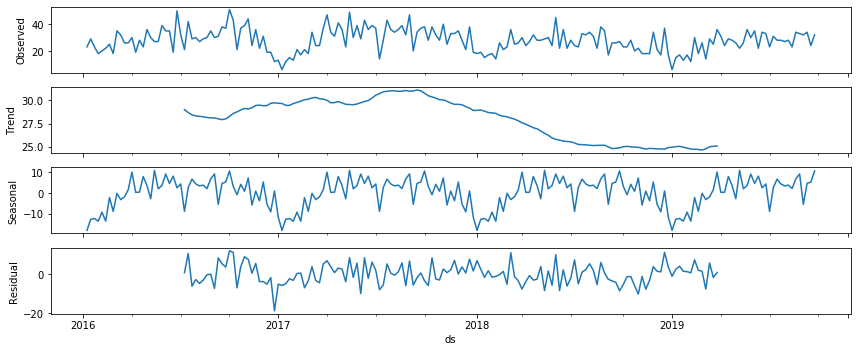

In [17]:
plot_decompose(condo_week_data)

## Weekly average sale price (CITIES)
+ normalize target

In [18]:
sm_week_split_avg_close_price = week_split_avg_close_price(sm_data)
bh_week_split_avg_close_price = week_split_avg_close_price(bh_data)
sl_week_split_avg_close_price = week_split_avg_close_price(sl_data)

## Weekly average sale COUNT (CITIES)

In [19]:
sm_week_split_count = week_split_count_close_price(sm_data)
bh_week_split_count = week_split_count_close_price(bh_data)
sl_week_split_count = week_split_count_close_price(sl_data)

## Examining and forecasting weekly avg sale price by city

## SilverLake AVG Sale Price Trend

MAPE = 0.006
RMSE = 0.114
MEAN = 13.88
BASELINE MAPE = 0.01
BASELINE RMSE = 0.119


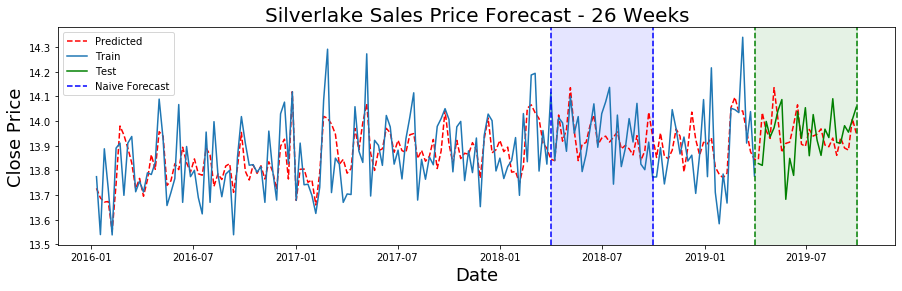

In [20]:
split=169
freq='W'
# plot_compare(sm_count_weekly_data,bh_count_weekly_data,sl_count_weekly_data,freq)
prophet_analysis_type(sl_week_split_avg_close_price,split,freq)


# Label plots
plt.title('Silverlake Sales Price Forecast - 26 Weeks', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.savefig('pictures/sl_price.png');

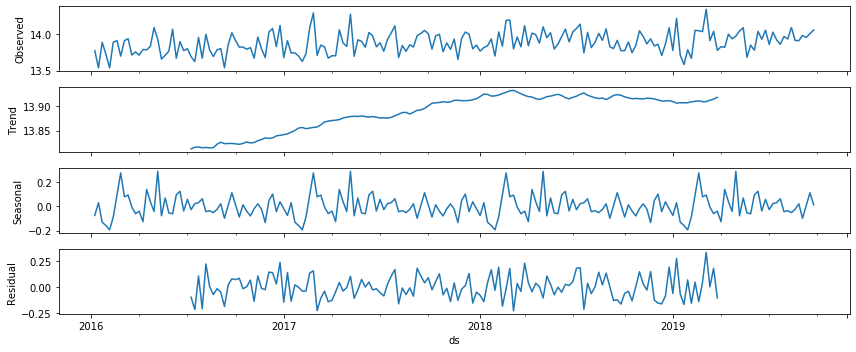

In [21]:
plot_decompose(sl_week_split_avg_close_price)

## Silverlake Sales Count

MAPE = 0.053
RMSE = 0.214
MEAN = 3.09
BASELINE MAPE = 0.077
BASELINE RMSE = 0.293


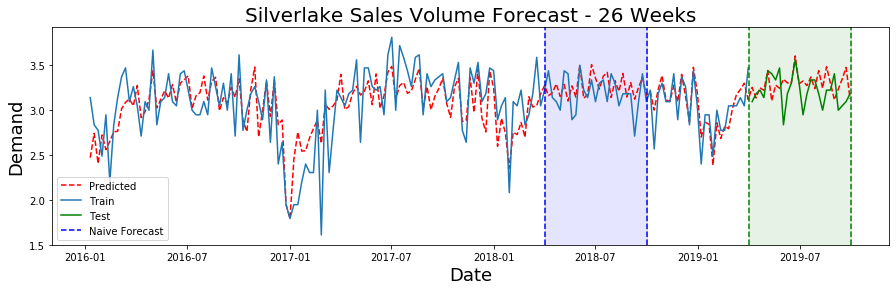

In [22]:
split=169
freq='W'
prophet_analysis_type(sl_week_split_count,split,freq)

# Label plots
plt.title('Silverlake Sales Volume Forecast - 26 Weeks', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Demand', fontsize=18)
plt.savefig('pictures/sl_volume.png');

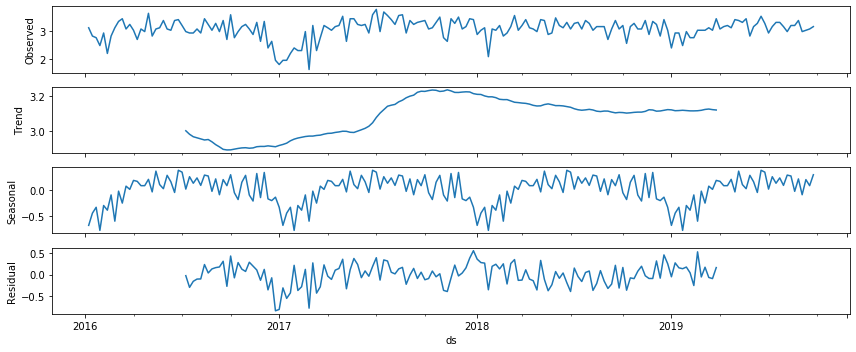

In [23]:
plot_decompose(sl_week_split_count)

## Santa Monica AVG Sale Price Trend

MAPE = 0.019
RMSE = 0.317
MEAN = 14.19
BASELINE MAPE = 0.021
BASELINE RMSE = 0.283


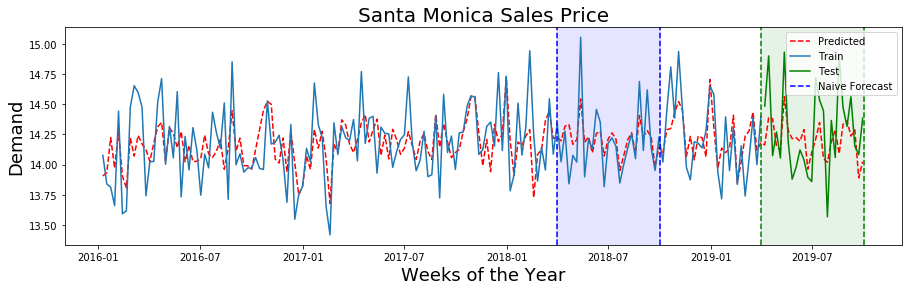

In [24]:
split=169
freq='W'
changepoints = 5
# plot_compare(sm_count_weekly_data,bh_count_weekly_data,sl_count_weekly_data,freq)
prophet_analysis_type(sm_week_split_avg_close_price,split,freq)
plt.title('Santa Monica Sales Price', fontsize=20)
plt.xlabel('Weeks of the Year', fontsize=18)
plt.ylabel('Demand', fontsize=18)
plt.savefig('pictures/sm_price.png');

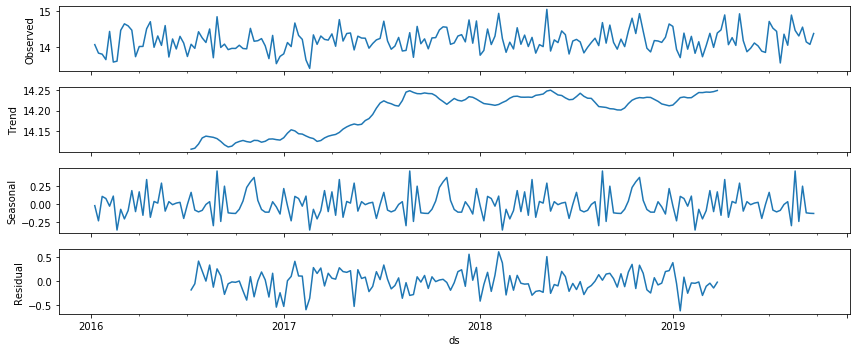

In [25]:
plot_decompose(sm_week_split_avg_close_price)

## Santa Monica Sales Count

MAPE = 0.26
RMSE = 0.472
MEAN = 1.98
BASELINE MAPE = 0.47
BASELINE RMSE = 0.708


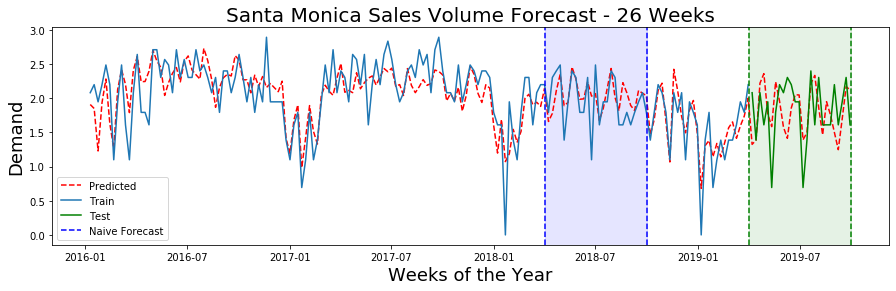

In [26]:
split=169
freq='W'
prophet_analysis_type(sm_week_split_count,split,freq)
# Label plots
plt.xlabel('Weeks of the Year', fontsize=18)
plt.ylabel('Demand', fontsize=18)
plt.title('Santa Monica Sales Volume Forecast - 26 Weeks', fontsize=20)
plt.savefig('pictures/sm_volume.png');

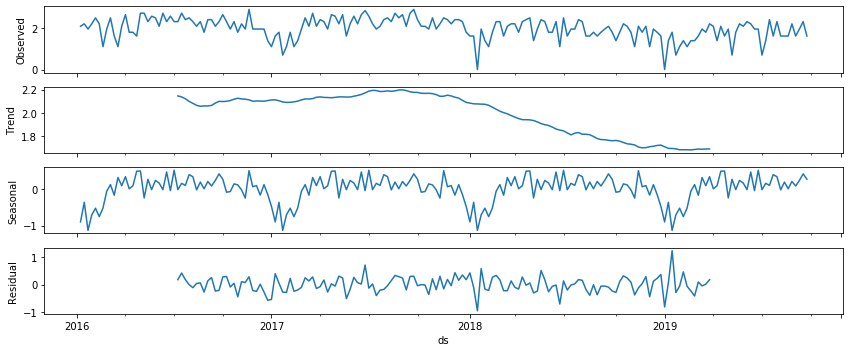

In [27]:
plot_decompose(sm_week_split_count)

## Mid-Wilshire AVG Sale Price Trend

MAPE = 0.009
RMSE = 0.146
MEAN = 14.27
BASELINE MAPE = 0.011
BASELINE RMSE = 0.149


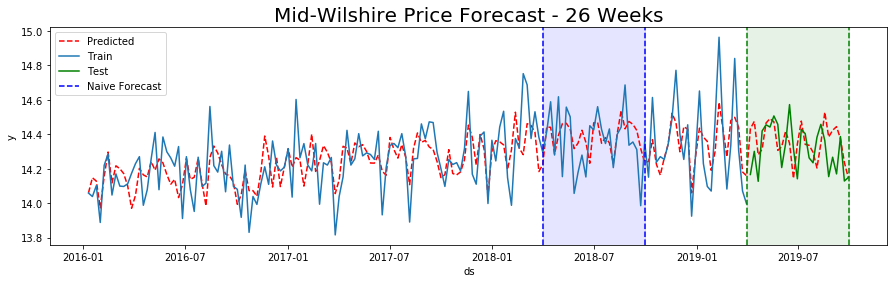

In [28]:
split=169
freq='W'
prophet_analysis_type(bh_week_split_avg_close_price,split,freq)
plt.title('Mid-Wilshire Price Forecast - 26 Weeks', fontsize=20)
plt.savefig('pictures/wilshire_price.png');

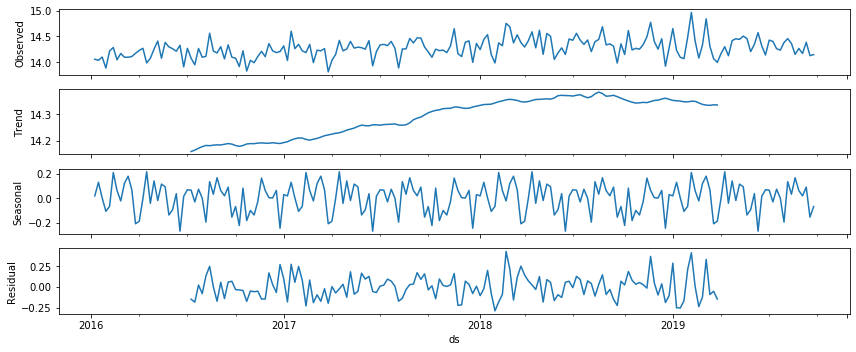

In [29]:
plot_decompose(bh_week_split_avg_close_price)

## Mid-Wilshire Sales Count

MAPE = 0.051
RMSE = 0.221
MEAN = 3.47
BASELINE MAPE = 0.067
BASELINE RMSE = 0.33


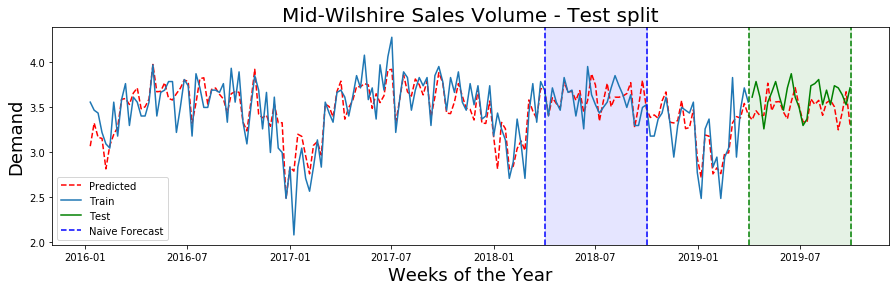

In [30]:
split=169
freq='W'
prophet_analysis_type(bh_week_split_count,split,freq)
# Label plots
plt.xlabel('Weeks of the Year', fontsize=18)
plt.ylabel('Demand', fontsize=18)
plt.title('Mid-Wilshire Sales Volume - Test split', fontsize=20)
plt.savefig('pictures/wilshire_volume.png');

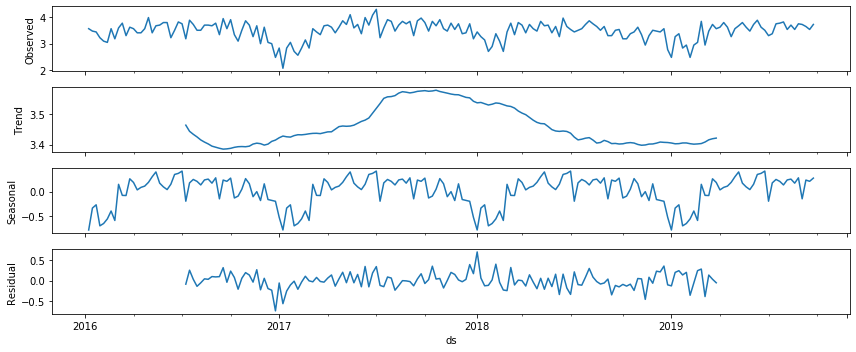

In [31]:
plot_decompose(bh_week_split_count)

## Compare behavior of each city's historical home price pattern

''

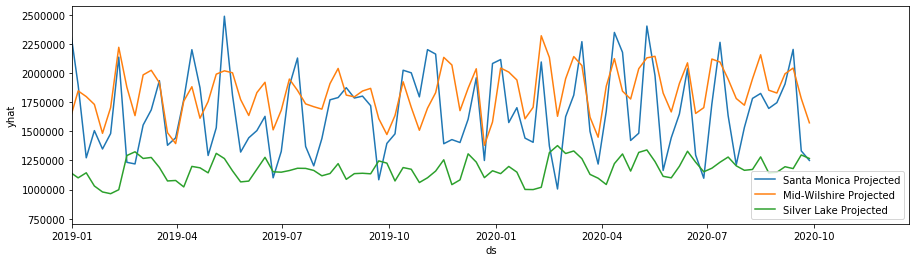

In [32]:
sm_week_split_avg_close_price = week_split_avg_close_price(sm_data)
bh_week_split_avg_close_price = week_split_avg_close_price(bh_data)
sl_week_split_avg_close_price = week_split_avg_close_price(sl_data)

split=169
freq='W'
plot_compare(sm_week_split_avg_close_price,bh_week_split_avg_close_price,sl_week_split_avg_close_price,freq)
plt.xlim(pd.to_datetime('2019-01-01'))
# plt.axvline(pd.to_datetime('2019-10-01'),color='r',linestyle='--')
plt.savefig('pictures/price_forecast.png')
;

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


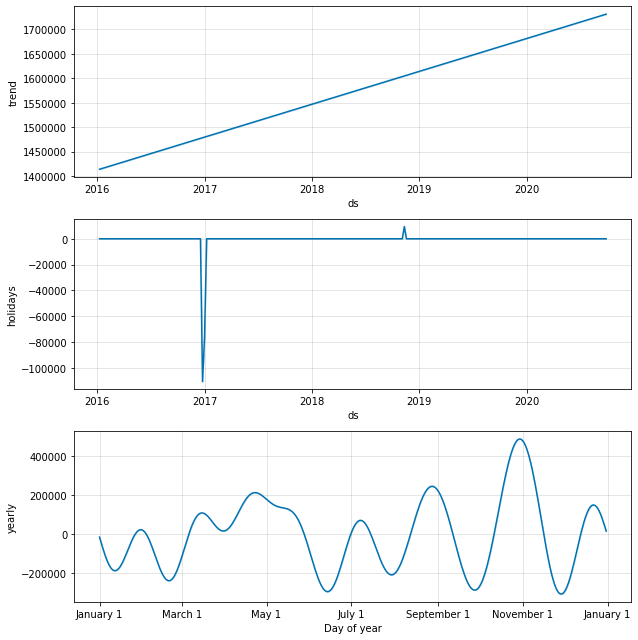

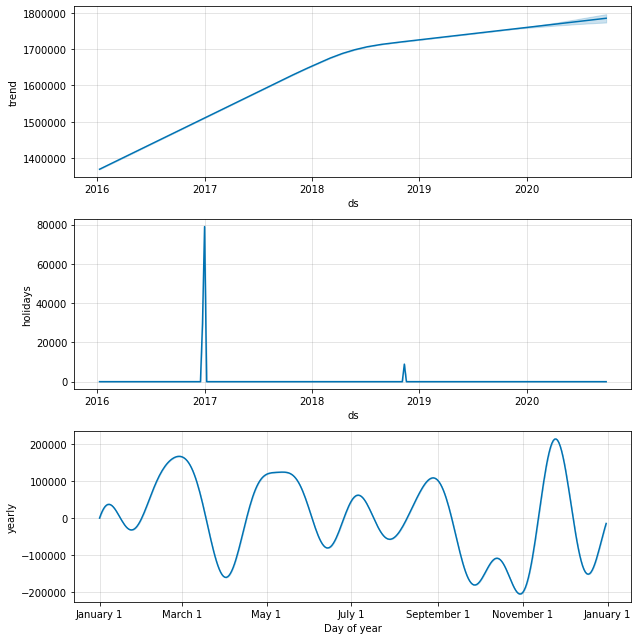

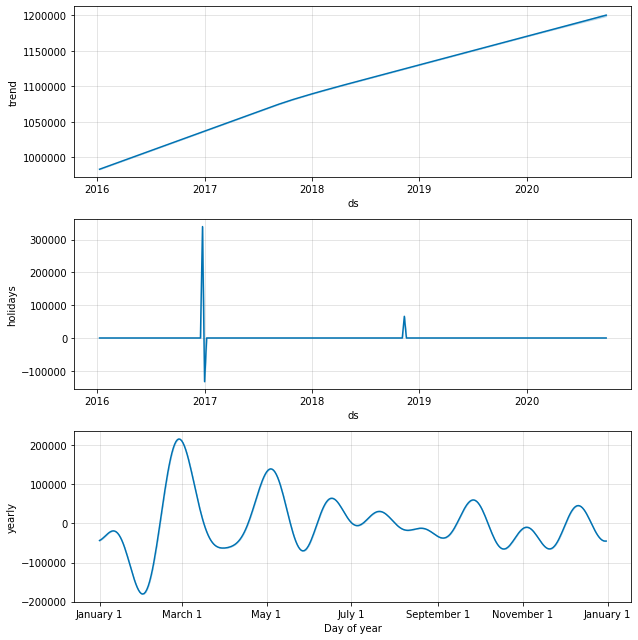

In [33]:
sm_future, bh_future, sl_future = give_forecast(sm_week_split_avg_close_price,bh_week_split_avg_close_price,sl_week_split_avg_close_price,freq)


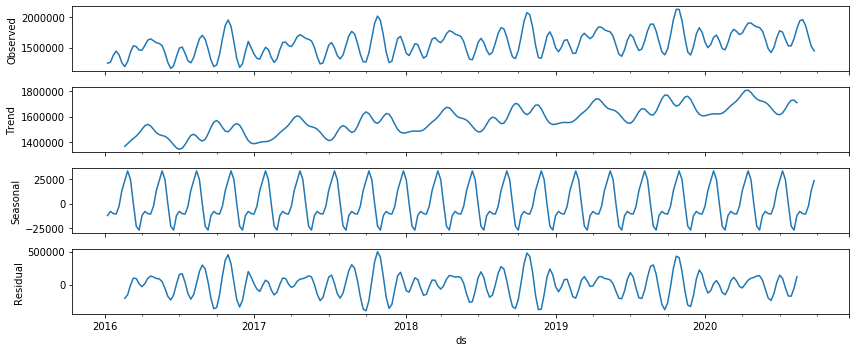

In [34]:
plot_future_decompose(sm_future)

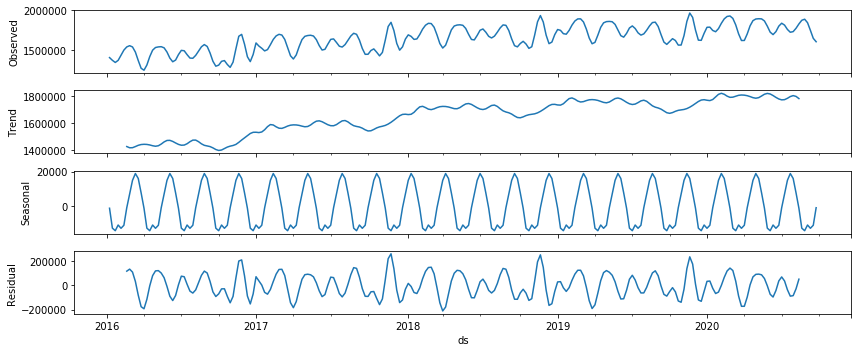

In [35]:
plot_future_decompose(bh_future)

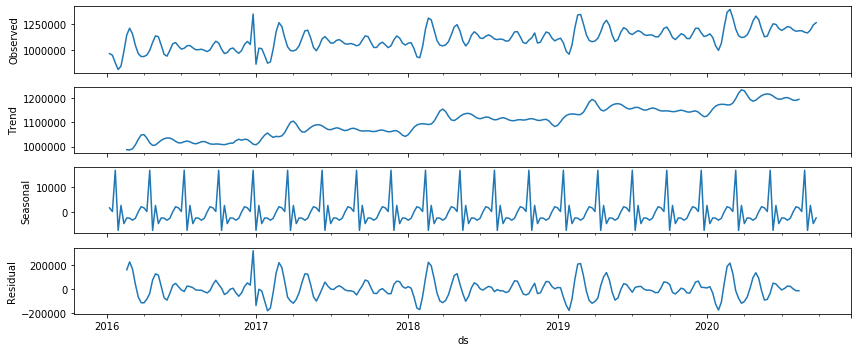

In [36]:
plot_future_decompose(sl_future)

''

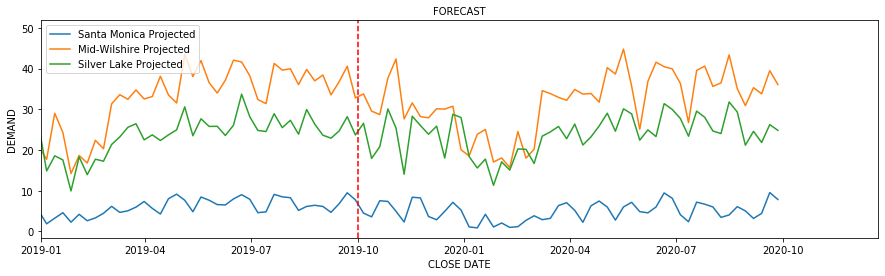

In [37]:
sm_week_split_count = week_split_count_close_price(sm_data)
bh_week_split_count = week_split_count_close_price(bh_data)
sl_week_split_count = week_split_count_close_price(sl_data)

split=169
freq='W'
plot_compare(sm_week_split_count,bh_week_split_count,sl_week_split_count,freq)
plt.xlim(pd.to_datetime('2019-01-01'))
plt.axvline(pd.to_datetime('2019-10-01'),color='r',linestyle='--')

# Label plots
plt.xlabel('CLOSE DATE', fontsize=10)
plt.ylabel('DEMAND', fontsize=10)
plt.title('FORECAST', fontsize=10)
plt.savefig('pictures/count_forecast.png')
;

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


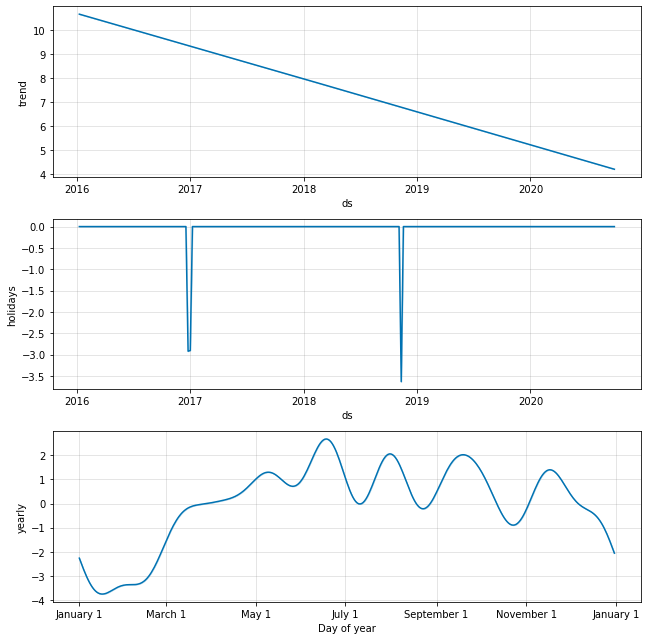

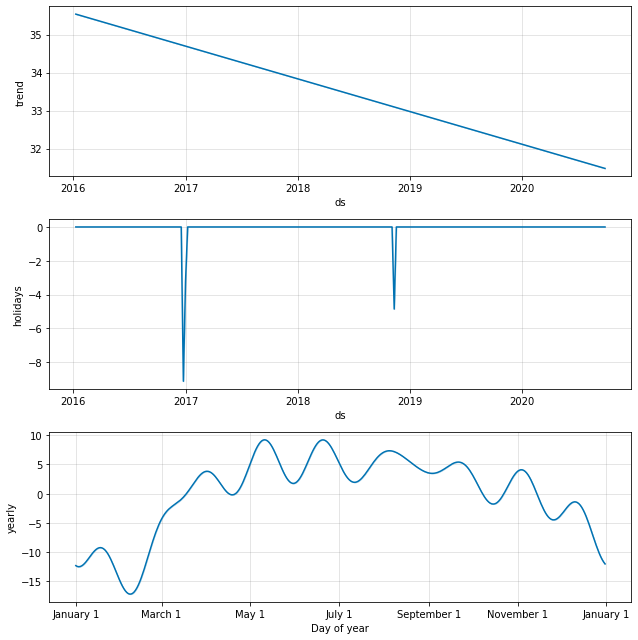

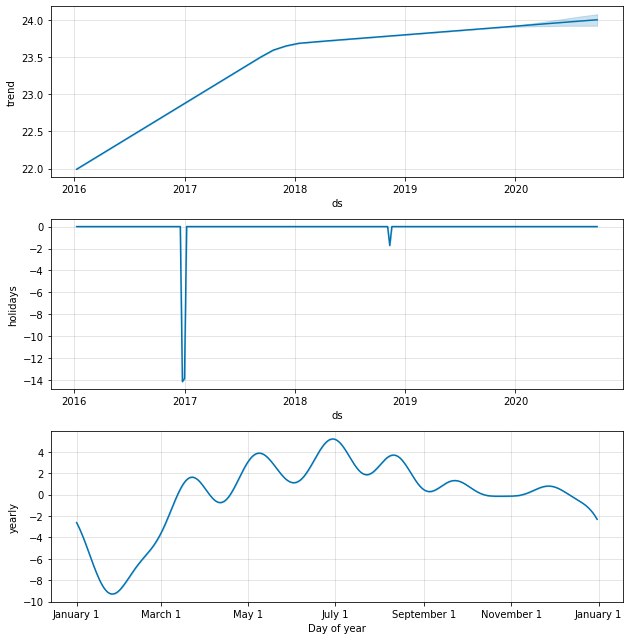

In [38]:
sm_future, bh_future, sl_future = give_forecast(sm_week_split_count,bh_week_split_count,sl_week_split_count,freq)

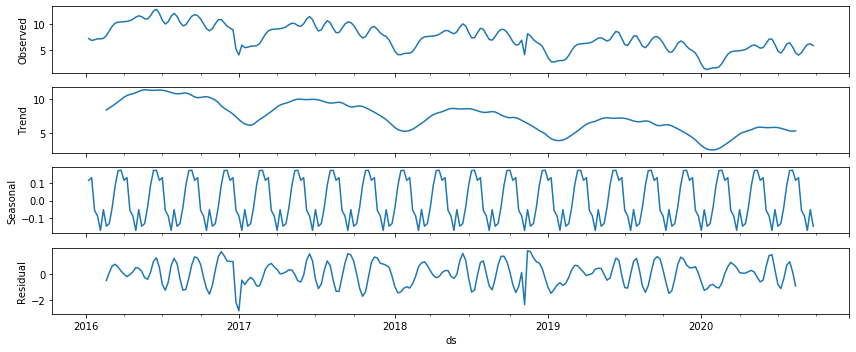

In [39]:
plot_future_decompose(sm_future)

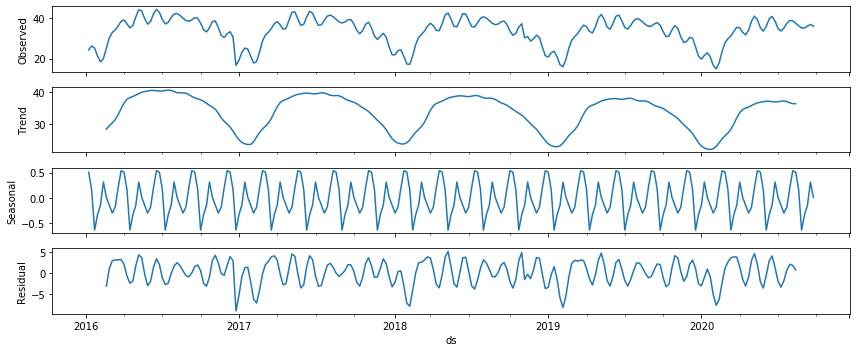

In [40]:
plot_future_decompose(bh_future)

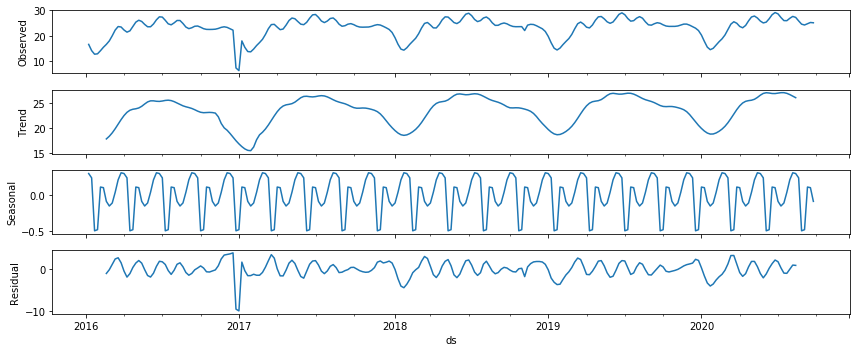

In [41]:
plot_future_decompose(sl_future)

In [42]:
sm_week_split_count = week_split_count_close_price(sm_data)
bh_week_split_count = week_split_count_close_price(bh_data)
sl_week_split_count = week_split_count_close_price(sl_data)

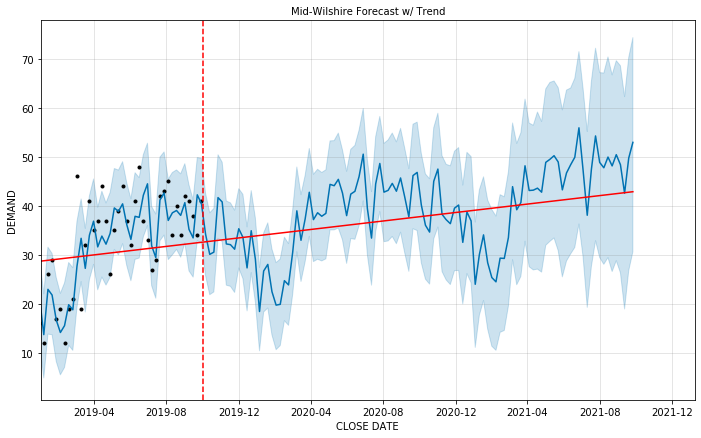

In [43]:
master_model=Prophet(
    growth='linear',
    n_changepoints=3,
    changepoint_range=0.8,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='additive',
    seasonality_prior_scale=20,
    changepoint_prior_scale=.5,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    ).add_seasonality(
        name='weekly',
        period=7,
        fourier_order=20
    ).add_seasonality(
        name='yearly',
        period=365.25,
        fourier_order=20)
master_model.add_country_holidays(country_name='US')
master_model.fit(bh_week_split_count)
master_future = master_model.make_future_dataframe(periods=104,freq='W')
master_forecast = master_model.predict(master_future)


fig = master_model.plot(master_forecast)
a = add_changepoints_to_plot(fig.gca(),master_model,master_forecast)
plt.axvline(pd.to_datetime('2019-10-01'),color='r',linestyle='--')
plt.xlim(pd.to_datetime('2019-01-01'))
# Label plots
plt.xlabel('CLOSE DATE', fontsize=10)
plt.ylabel('DEMAND', fontsize=10)
plt.title('Mid-Wilshire Forecast w/ Trend', fontsize=10)
plt.savefig('Mid-Wilshire_forecast_w_trend.png');

''

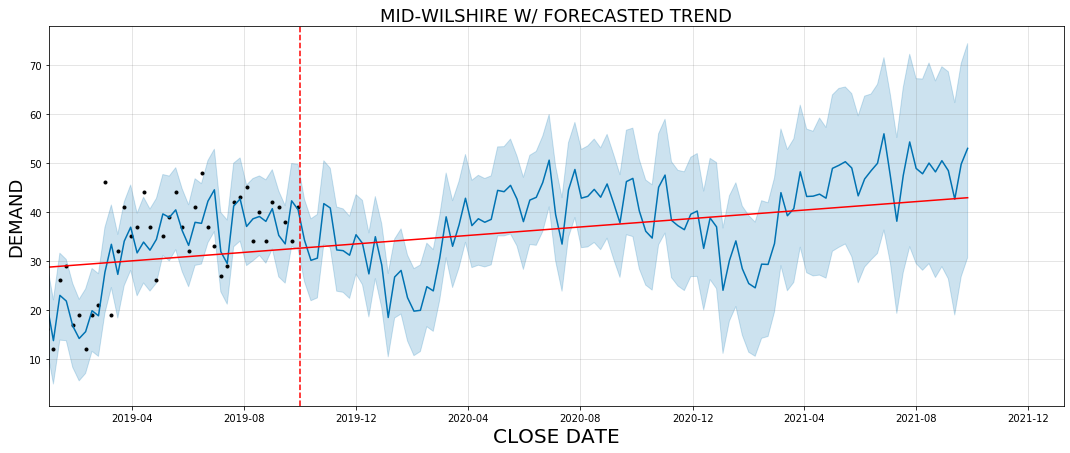

In [44]:
fig = plot(master_model, master_forecast, figsize=(15, 6))
a = add_changepoints_to_plot(fig.gca(),master_model,master_forecast)
plt.axvline(pd.to_datetime('2019-10-01'),color='r',linestyle='--')
plt.xlim(pd.to_datetime('2019-01-01'))
# Label plots
plt.xlabel('CLOSE DATE', fontsize=20)
plt.ylabel('DEMAND', fontsize=18)
plt.title('MID-WILSHIRE W/ FORECASTED TREND', fontsize=18)
plt.savefig('pictures/midwilshire_forecasted_trend.png')
;

In [45]:
bh_future.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),Christmas Day (Observed)_lower,Christmas Day (Observed)_upper,Columbus Day,Columbus Day_lower,Columbus Day_upper,Independence Day,Independence Day_lower,Independence Day_upper,Labor Day,Labor Day_lower,Labor Day_upper,"Martin Luther King, Jr. Day","Martin Luther King, Jr. Day_lower","Martin Luther King, Jr. Day_upper",Memorial Day,Memorial Day_lower,Memorial Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,New Year's Day (Observed),New Year's Day (Observed)_lower,New Year's Day (Observed)_upper,Thanksgiving,Thanksgiving_lower,Thanksgiving_upper,Veterans Day,Veterans Day_lower,Veterans Day_upper,Veterans Day (Observed),Veterans Day (Observed)_lower,Veterans Day (Observed)_upper,Washington's Birthday,Washington's Birthday_lower,Washington's Birthday_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
242,2020-08-30,31.545483,25.767016,44.985818,31.545405,31.545564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.659004,3.659004,3.659004,0.0,0.0,0.0,3.659004,3.659004,3.659004,0.0,0.0,0.0,35.204487
243,2020-09-06,31.528969,24.857070,44.835833,31.528889,31.529052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.597018,3.597018,3.597018,0.0,0.0,0.0,3.597018,3.597018,3.597018,0.0,0.0,0.0,35.125987
244,2020-09-13,31.512455,26.900905,45.363457,31.512373,31.512542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.536219,4.536219,4.536219,0.0,0.0,0.0,4.536219,4.536219,4.536219,0.0,0.0,0.0,36.048673
245,2020-09-20,31.495940,27.258425,46.556093,31.495857,31.496031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.402530,5.402530,5.402530,0.0,0.0,0.0,5.402530,5.402530,5.402530,0.0,0.0,0.0,36.898470
246,2020-09-27,31.479426,25.953340,45.358893,31.479341,31.479519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.538265,4.538265,4.538265,0.0,0.0,0.0,4.538265,4.538265,4.538265,0.0,0.0,0.0,36.017692


In [46]:
bh_week_split_count.tail()

,ds,y
190,2019-09-01,42
191,2019-09-08,41
192,2019-09-15,38
193,2019-09-22,34
194,2019-09-29,41


## CV

For calculating accuracy we use mean absolute percent error (MAPE). 

In [47]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [48]:

split=169
freq='W'

df_cv, perf = prophet_cv_analysis(master_week_data,freq,changepoints=3)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-04-02 00:00:00 and 2019-04-02 00:00:00


          ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2019-04-07  4.690893    4.520531    4.872820  4.700480 2019-04-02
1 2019-04-14  4.605145    4.410260    4.768753  4.804021 2019-04-02
2 2019-04-21  4.733123    4.558729    4.903293  4.787492 2019-04-02
3 2019-04-28  4.675948    4.500326    4.854852  4.663439 2019-04-02
4 2019-05-05  4.875200    4.690557    5.052506  4.820282 2019-04-02
  horizon       mse      rmse       mae      mape  coverage
0 12 days  0.019822  0.140790  0.104232  0.021719       0.5
1 19 days  0.021254  0.145787  0.126622  0.026377       0.5
2 26 days  0.001556  0.039449  0.033439  0.007019       1.0
3 33 days  0.001586  0.039828  0.033714  0.007038       1.0
4 40 days  0.008989  0.094812  0.088620  0.018610       1.0


In [49]:
master_weekly_mape = perf.mape.mean()
print(master_weekly_mape)

0.01889010388220835


## MAPE is relative to size

In [50]:
split=169
freq='W'

df_cv, perf = prophet_cv_analysis(sl_week_split_avg_close_price,freq,changepoints=3)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-04-02 00:00:00 and 2019-04-02 00:00:00


          ds       yhat  yhat_lower  yhat_upper          y     cutoff
0 2019-04-07  13.833786   13.690485   13.988620  13.827933 2019-04-02
1 2019-04-14  14.031002   13.895058   14.179621  13.820498 2019-04-02
2 2019-04-21  13.938617   13.785797   14.108457  13.998665 2019-04-02
3 2019-04-28  13.922854   13.777083   14.068758  13.935957 2019-04-02
4 2019-05-05  14.116048   13.955878   14.260789  13.972514 2019-04-02
  horizon       mse      rmse       mae      mape  coverage
0 12 days  0.022173  0.148906  0.108179  0.007827       0.5
1 19 days  0.023959  0.154787  0.135276  0.009760       0.5
2 26 days  0.001889  0.043460  0.036576  0.002615       1.0
3 33 days  0.010387  0.101916  0.078318  0.005606       1.0
4 40 days  0.011159  0.105634  0.092475  0.006611       1.0


In [51]:
master_weekly_mape = perf.mape.mean()
print(master_weekly_mape)

0.006846819901437973


## Santa Monica Cross Validation Set

In [52]:

split=169
freq='W'

df_cv, perf = prophet_cv_analysis(sm_week_split_avg_close_price,freq,changepoints=3)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-04-02 00:00:00 and 2019-04-02 00:00:00


          ds       yhat  yhat_lower  yhat_upper          y     cutoff
0 2019-04-07  14.150178   13.828620   14.462991  14.484365 2019-04-02
1 2019-04-14  14.346450   14.004882   14.670066  14.899009 2019-04-02
2 2019-04-21  14.329762   14.003584   14.660838  14.074021 2019-04-02
3 2019-04-28  14.107083   13.793846   14.439174  14.269766 2019-04-02
4 2019-05-05  14.061801   13.758756   14.408039  14.054527 2019-04-02
  horizon       mse      rmse       mae      mape  coverage
0 12 days  0.208502  0.456620  0.443373  0.030080       0.0
1 19 days  0.185363  0.430538  0.404150  0.027629       0.5
2 26 days  0.045935  0.214324  0.209212  0.014786       1.0
3 33 days  0.013259  0.115149  0.084978  0.005959       1.0
4 40 days  0.086013  0.293279  0.210984  0.014146       0.5


## Santa Monica MAPE

In [53]:
master_weekly_mape = perf.mape.mean()
print(master_weekly_mape)

0.018642172024476395


## Beverly Hills CV

In [54]:

split=169
freq='W'

df_cv, perf = prophet_cv_analysis(bh_week_split_avg_close_price,freq,changepoints=3)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2019-04-02 00:00:00 and 2019-04-02 00:00:00


          ds       yhat  yhat_lower  yhat_upper          y     cutoff
0 2019-04-07  14.404538   14.229179   14.610327  14.166167 2019-04-02
1 2019-04-14  14.454823   14.247245   14.627809  14.300615 2019-04-02
2 2019-04-21  14.254928   14.070541   14.443801  14.126665 2019-04-02
3 2019-04-28  14.290895   14.093051   14.500154  14.418733 2019-04-02
4 2019-05-05  14.440032   14.255505   14.629508  14.454729 2019-04-02
  horizon       mse      rmse       mae      mape  coverage
0 12 days  0.040300  0.200750  0.196289  0.013805       0.5
1 19 days  0.020116  0.141830  0.141236  0.009931       1.0
2 26 days  0.016397  0.128051  0.128051  0.008973       1.0
3 33 days  0.008279  0.090990  0.071268  0.004941       1.0
4 40 days  0.000483  0.021967  0.021034  0.001456       1.0


In [55]:
master_weekly_mape = perf.mape.mean()
print(master_weekly_mape)

0.00798328432998924


## Plotting the Cross Validation metrics

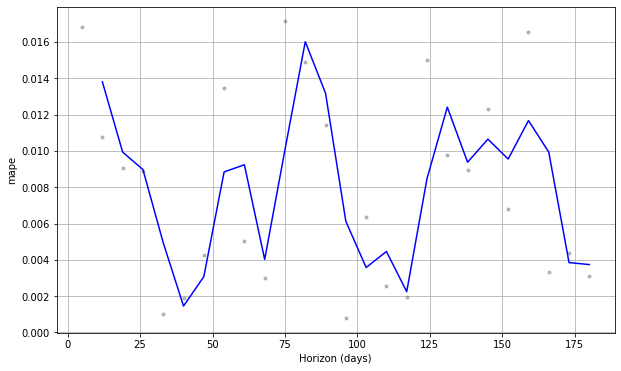

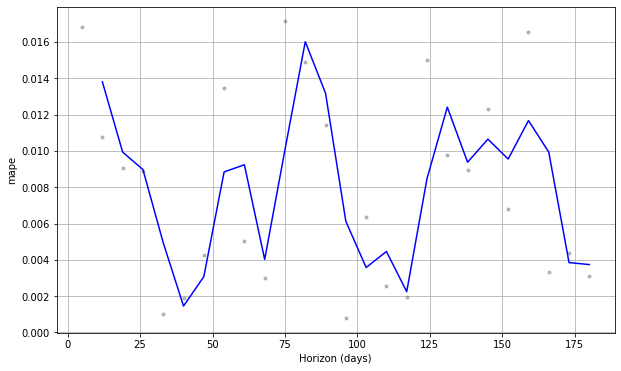

In [56]:
plot_cross_validation_metric(df_cv,metric='mape')